In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [41]:
df = pd.read_json('./DataCoordinates/ny_coordinates.json')
coordinates = json.loads(json.dumps(df["coordinates"].tolist()))

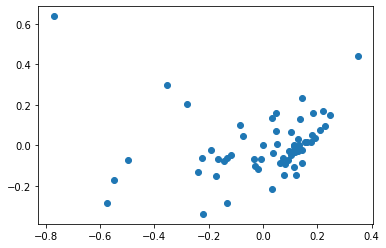

In [67]:
x = list(map(lambda x: x["x"], coordinates))
y = list(map(lambda x: x["y"], coordinates))

data = np.array([x, y]).T
plt.scatter(x=data[:, 0], y=data[:, 1])
plt.show()

In [104]:
# def euclidian_distance(p1, p2, r=3):
#     return round(math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2), r)

In [190]:
def mahalanobis_distance(p1, p2, cov, r=3):
    
    f = (p1-p2).T
    cov_inv = np.linalg.inv(cov)
    f = np.matmul(f, cov_inv)
    s = (p1-p2)
    res = np.matmul(f, s)
    return round(math.sqrt(res.squeeze()), r)


In [192]:
def distance_matrix(data, dist_func):
    res = []
    for i in range(len(data[0])):
        row = []
        for j in range(len(data[0])):
            p1 = np.array([data[0][i], data[1][i]])
            p2 = np.array([data[0][j], data[1][j]])
            cov = np.cov(data)
            row.append(dist_func(p1, p2, cov))
        res.append(row)
    return res

In [193]:
print(distance_matrix(data, mahalanobis_distance))

[[0.0, 1.738, 2.097, 0.963, 1.512, 1.597, 1.647, 1.213, 1.98, 1.351, 2.454, 1.606, 2.489, 0.925, 0.496, 2.451, 1.051, 1.795, 1.582, 1.986, 4.008, 1.892, 1.517, 1.634, 1.716, 1.386, 1.591, 0.272, 1.44, 1.735, 5.278, 1.318, 1.004, 0.432, 1.659, 0.644, 1.488, 1.621, 1.606, 1.823, 1.271, 0.89, 0.272, 0.453, 1.549, 1.669, 0.392, 2.14, 2.257, 1.468, 1.673, 1.163, 1.079, 1.967, 1.77, 1.472, 2.276, 1.824, 1.693, 2.399, 1.566, 1.727], [1.738, 0.0, 3.3, 0.776, 0.656, 0.947, 0.775, 0.83, 1.199, 0.485, 2.439, 0.586, 1.942, 1.576, 1.32, 2.054, 0.687, 1.052, 0.928, 1.759, 3.819, 1.056, 1.415, 3.123, 0.797, 0.614, 0.741, 1.47, 0.415, 3.034, 6.728, 1.072, 0.832, 1.327, 1.361, 1.363, 0.77, 0.276, 0.835, 2.02, 2.955, 0.922, 1.713, 1.698, 0.198, 1.89, 1.347, 1.459, 1.591, 0.519, 0.957, 1.908, 1.146, 1.284, 1.929, 1.463, 1.966, 1.041, 1.131, 3.721, 0.809, 0.411], [2.097, 3.3, 0.0, 2.718, 3.402, 3.58, 3.572, 3.161, 3.983, 3.134, 4.542, 2.831, 4.567, 3.021, 2.524, 4.542, 2.738, 3.785, 3.56, 4.078, 6.085, 3.